# Week 1

## Overview
As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

**Hint**: And you can ask us for help at any point if you get stuck!

## Today

This first lecture will go over a few different topics to get you started 

* First, I'll explain a little bit about what we'll be doing this year (hint, you may want to watch _Minority Report_ if you want to prepare deeply for the class 😊).
* Second, we'll start by loading some real-world data into your very own computers and getting started with some data analysis.

## Part 1: Predictive policing. A case to learn from

For a number of years I've been a little bit obsessed with [predictive policing](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens). I guess there are various reasons. For example:

* I think it's an interesting application of data science. 
* It connects to popular culture in a big way. Both through TV shows, such as [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) (it also features in Bones ... or any of the CSI), and also any number of movies, my favorite of which has to be [Minority report](https://www.imdb.com/title/tt0181689/).
* Predictive policing is also big business. Companies like [PredPol](https://www.predpol.com), [Palantir](https://www.theverge.com/2018/2/27/17054740/palantir-predictive-policing-tool-new-orleans-nopd), and many other companies offer their services law enforcement by analyzing crime data. 
* It hints at the dark sides of Data Science. In these algorithms, concepts like [bias, fairness, and accountability](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/) become incredibly important when the potential outcome of an algorithm is real people going to prison.  
* And, finally there's lots of data available!! Chicago, NYC, and San Francisco all have crime data available freely online.

Below is a little video to pique your interest. 

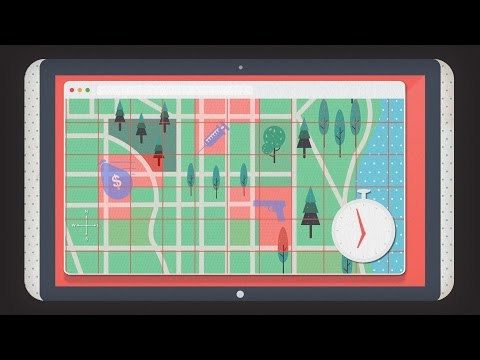

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("YxvyeaL7NEM",width=800, height=450)

All this is to say that in the coming weeks, we'll be working to understand crime in San Francisco. We'll be using the SF crime data as a basis for our work on data analysis and data visualization. 

We will draw on data from the project [SF OpenData](https://data.sfgov.org), looking into SFPD incidents which have been recorded back since January 2003.

*Reading*

Read [this article](https://www.sciencemag.org/news/2016/09/can-predictive-policing-prevent-crime-it-happens) from science magazine to get a bit deeper sense of the topic.


> *Exercise*
> 
> Answer the following questions in your own words
> 
> * According to the article, is predictive policing better than best practice techniques for law enforcement? The article is from 2016. Take a look around the web, does this still seem to be the case in 2020? (hint, when you evaluate the evidence consider the source)
> * List and explain some of the possible issues with predictive policing according to the article. 

# Part 2: Load some crime-data into `pandas`

Go and check out the [Python Bootcamp](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/PythonBootcamp.ipynb) lecture if you don't know what "loading data into Pandas" means. If you're used to using Pandas, then it's finally time to get your hands on some data!!

> *Exercise 1*
>
> * Go to https://datasf.org/opendata/
> * Click on "Public Safety"
> * Download all police incidence reports, historical 2003 to may 2018. You can get everything as a big CSV file if you press the *Export* button (it's a snappy little ~500MB file).
> * Load the data into `pandas` using thie tips and tricks described [here](https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/).
> * Use pandas to generate the following simple statistics
>   - Report the total number of crimes in the dataset.
>   - List the various categories of crime. How many are there? 
>   - List the number of crimes in each category.

---

In order to do awesome *predictive policing* later on in the class, we're going to dissect the SF crime-data quite thoroughly to figure out what has been going on over the last  years on the San Francisco crime scene. 

> *Exercise 2*: The types of crimes. The first field we'll dig into is the column "Category".
> * We have already counted the number of crimes in each category. What is the most commonly occurring category of crime? What is the least frequently occurring?
> * Create a bar-plot over crime occurrences (**N.B.** for a plot to be informative we have to remember to add any relevant info, e.g., title, labels, etc.). Mine looks like this 

<div>
<img src="https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png" width="700"/>
</div>

---

The plot above already gives us a bit of information but does not tell us anything about how crimes changed over the years. Let's have a look at it!

> *Exercise 3*: Temporal patterns.
> * To start off easily, let's count the number of crimes per year:
>     * What is the year with most crimes? 
>     * What is the year with less crimes? (**hint** if your result is 2018, have a further look at the data you have. Is it complete? If not, how would you pre-process the data to answer these questions?).
>     * What's the average number of crimes per year? 
> * Now, let's change our bar-plot above by replacing the count with the *average number of crimes per year by category* and by adding its *standard deviation*.
> * Finally, Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2017.
> 

part 2, exercise 1

In [70]:
import os
import pandas as pd
import numpy as np
D = pd.read_csv('../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv', \
                parse_dates=['Date'])
n, p = D.shape; print(f'rows = {n}, features = {p}')
print(D.columns)
D.describe()

rows = 2129525, features = 35
Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OW

,PdId,IncidntNum,Incident Code,X,Y,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
count,2.129525e+06,2.129525e+06,2.129525e+06,2.129525e+06,2.129525e+06,2.123558e+06,2.128444e+06,2.128878e+06,2.128500e+06,2.124316e+06,...,546652.000000,459947.000000,552162.000000,553462.000000,2.128500e+06,333720.0,333936.0,488596.000000,115980.00000,2.123558e+06
mean,1.042410e+13,1.042410e+08,2.753279e+04,-1.224228e+02,3.777135e+01,5.191933e+01,4.853053e+00,6.841214e+00,2.193723e+01,8.610686e+00,...,14.112302,2.149717,13.919509,6.297610,1.595479e+00,1.0,1.0,2.316869,36.68066,5.191933e+01
std,4.617922e+12,4.617922e+07,2.598539e+04,2.979630e-02,4.256712e-01,3.162770e+01,2.765017e+00,3.389863e+00,1.268341e+01,4.279847e+00,...,6.115738,1.185630,6.300728,2.518953,4.907991e-01,0.0,0.0,1.331082,10.22428,3.162770e+01
min,3.979630e+08,3.979000e+03,0.000000e+00,-1.225136e+02,3.770788e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.0,1.0,1.000000,2.00000,1.000000e+00
25%,6.125908e+12,6.125908e+07,6.244000e+03,-1.224330e+02,3.775388e+01,2.400000e+01,3.000000e+00,3.000000e+00,9.000000e+00,5.000000e+00,...,10.000000,1.000000,9.000000,5.000000,1.000000e+00,1.0,1.0,1.000000,35.00000,2.400000e+01
50%,1.011933e+13,1.011933e+08,1.520100e+04,-1.224166e+02,3.777542e+01,4.300000e+01,5.000000e+00,8.000000e+00,2.100000e+01,9.000000e+00,...,15.000000,3.000000,15.000000,6.000000,2.000000e+00,1.0,1.0,3.000000,35.00000,4.300000e+01
75%,1.409596e+13,1.409596e+08,6.301000e+04,-1.224070e+02,3.778466e+01,8.300000e+01,7.000000e+00,1.000000e+01,3.400000e+01,1.300000e+01,...,18.000000,3.000000,18.000000,7.000000,2.000000e+00,1.0,1.0,3.000000,35.00000,8.300000e+01
max,9.915824e+13,9.915824e+08,7.503000e+04,-1.205000e+02,9.000000e+01,1.170000e+02,1.000000e+01,1.100000e+01,4.100000e+01,1.500000e+01,...,25.000000,5.000000,25.000000,15.000000,2.000000e+00,1.0,1.0,5.000000,80.00000,1.170000e+02


Number of crimes = 2129525
Different crimes:
37
['LARCENY/THEFT' 'ASSAULT' 'MISSING PERSON' 'VEHICLE THEFT' 'BURGLARY'
 'DRUG/NARCOTIC' 'DRIVING UNDER THE INFLUENCE' 'VANDALISM'
 'OTHER OFFENSES' 'DRUNKENNESS' 'NON-CRIMINAL' 'ROBBERY' 'SUSPICIOUS OCC'
 'TRESPASS' 'WARRANTS' 'FORGERY/COUNTERFEITING' 'STOLEN PROPERTY'
 'SEX OFFENSES, FORCIBLE' 'FRAUD' 'SECONDARY CODES' 'PROSTITUTION'
 'RECOVERED VEHICLE' 'BRIBERY' 'ARSON' 'DISORDERLY CONDUCT' 'WEAPON LAWS'
 'LIQUOR LAWS' 'EXTORTION' 'SUICIDE' 'KIDNAPPING'
 'SEX OFFENSES, NON FORCIBLE' 'BAD CHECKS' 'EMBEZZLEMENT' 'LOITERING'
 'GAMBLING' 'TREA' 'PORNOGRAPHY/OBSCENE MAT']
Crimes per category:


Text(0.5, 1.0, 'Great title')

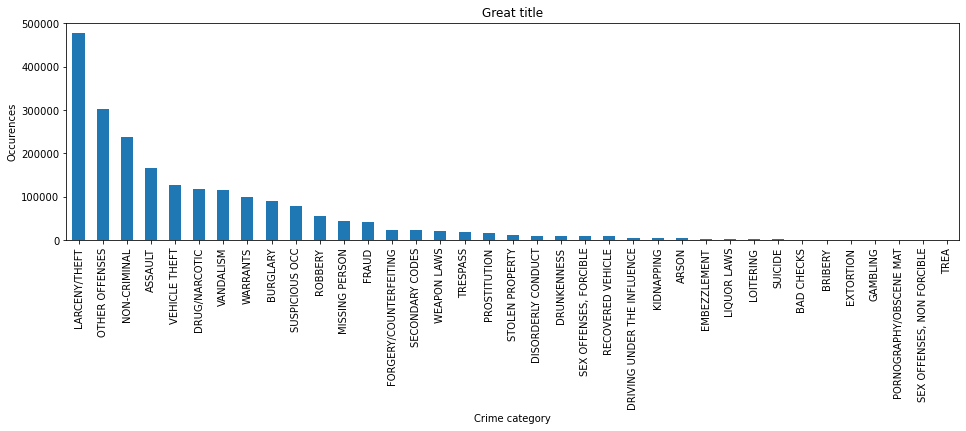

In [39]:
# a)
if D.IncidntNum.isna().sum() == 0:
    print(f'Number of crimes = {n}')

# b) 
print('Different crimes:')
print(len(D.Category.unique()))
print(D.Category.unique())

# c) + Exercise 2
print('Crimes per category:')
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (16, 4)

D.Category.value_counts().plot(kind='bar')
plt.xlabel('Crime category')
plt.ylabel('Occurences')
plt.title("Great title")

Average yearly number of crimes:  133095.3125


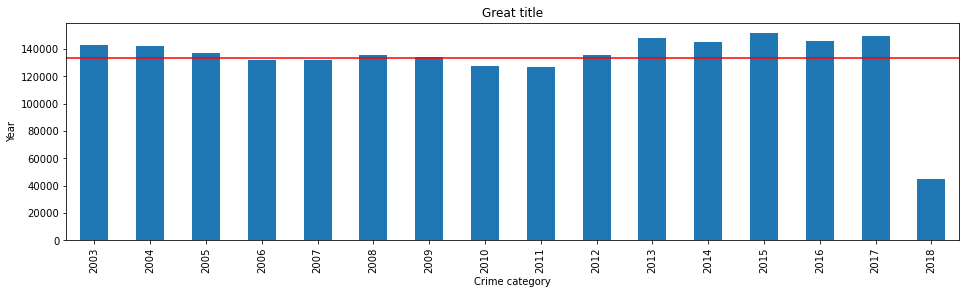

In [84]:
# Exercise 3
D['year'] = pd.DatetimeIndex(D['Date']).year
D['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Crime category')
plt.ylabel('Year')
plt.title("Great title")

print(f'Average yearly number of crimes: ', np.mean(D['year'].value_counts()))
plt.axhline(np.mean(D['year'].value_counts()), color="red")

In [1]:
# Ex 3.c
# Crimes per year per category
crimedict = dict()
for category in ordered_crimes:
    crimedict[str(category)] = D.year[D['Category']==str(category)].value_counts().sort_index()
    # for year in D['year'].unique():
    #     print( D[ (D['Category'] == category) & (D['year'] == year) ] )

NameError: name 'ordered_crimes' is not defined

In [173]:
labels, data = crimedict.keys(), crimedict.values()

plt.boxplot(data.keys)
plt.xticks(range(1, len(labels) + 1), labels)
plt.xticks(rotation='vertical')
plt.show()

AttributeError: 'dict_values' object has no attribute 'keys'

In [2]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

> * My plot looks like this for the 14 focus crimes:

  ![Barplots](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimesYearCategory.png)
>    
> (Note that titles are OVER the plots and the axes on the bottom are common for all plots.) 
> * Comment on at least three interesting trends in your plot. 
>    
> Also, here's a fun fact: The drop in car thefts is due to new technology called 'engine immobilizer systems' - get the full story [here](https://www.nytimes.com/2014/08/12/upshot/heres-why-stealing-cars-went-out-of-fashion.html). 

You've made it! You have successfully completed Lecture 1. If you didn't get enough, try to **personalize** your plots. We have already added titles, labels, etc., however, the look of default pandas plots is quite boring (that blue... and font... 😂). 